In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#creating a dataframe called "dataset"
#read from "machine.data"
#Specify the deliminators as whitespaces
#Specify the names of the columns
dataset = pd.read_csv('/content/drive/MyDrive/CPU_Performance/machine.data', delim_whitespace = False, names=['vendor_name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])

#Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
   10. ERP: estimated relative performance from the original article (integer)

In [ ]:
#Show the top 5 rows of the dataset
dataset.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
#Show how many row and columns the data has
dataset.shape

(209, 10)

In [ ]:
#Check if there is any missing values (null values)
dataset.isnull().values.any()

False

In [ ]:
#Show the summary of the dataset
dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
#checking any bad data by comparing their datatypes with the datas shown on the data.head()
dataset.dtypes


vendor_name    object
Model_Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ed26dcc10>,
      dtype=object)

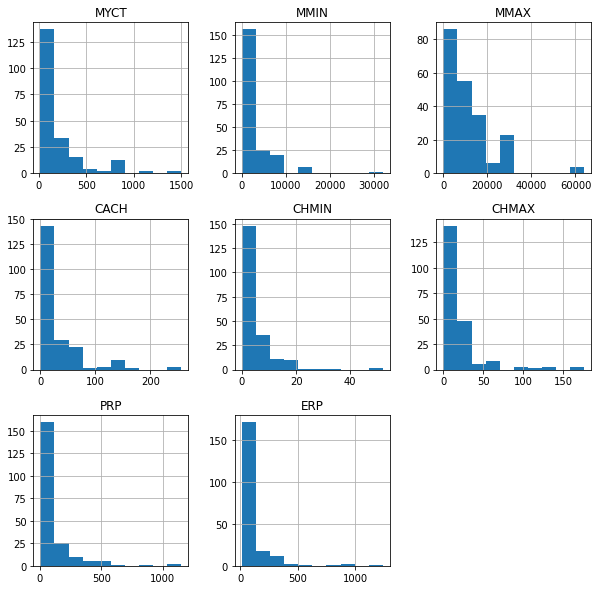

In [ ]:
#Create Histograms
dataset.hist(figsize=(10,10))

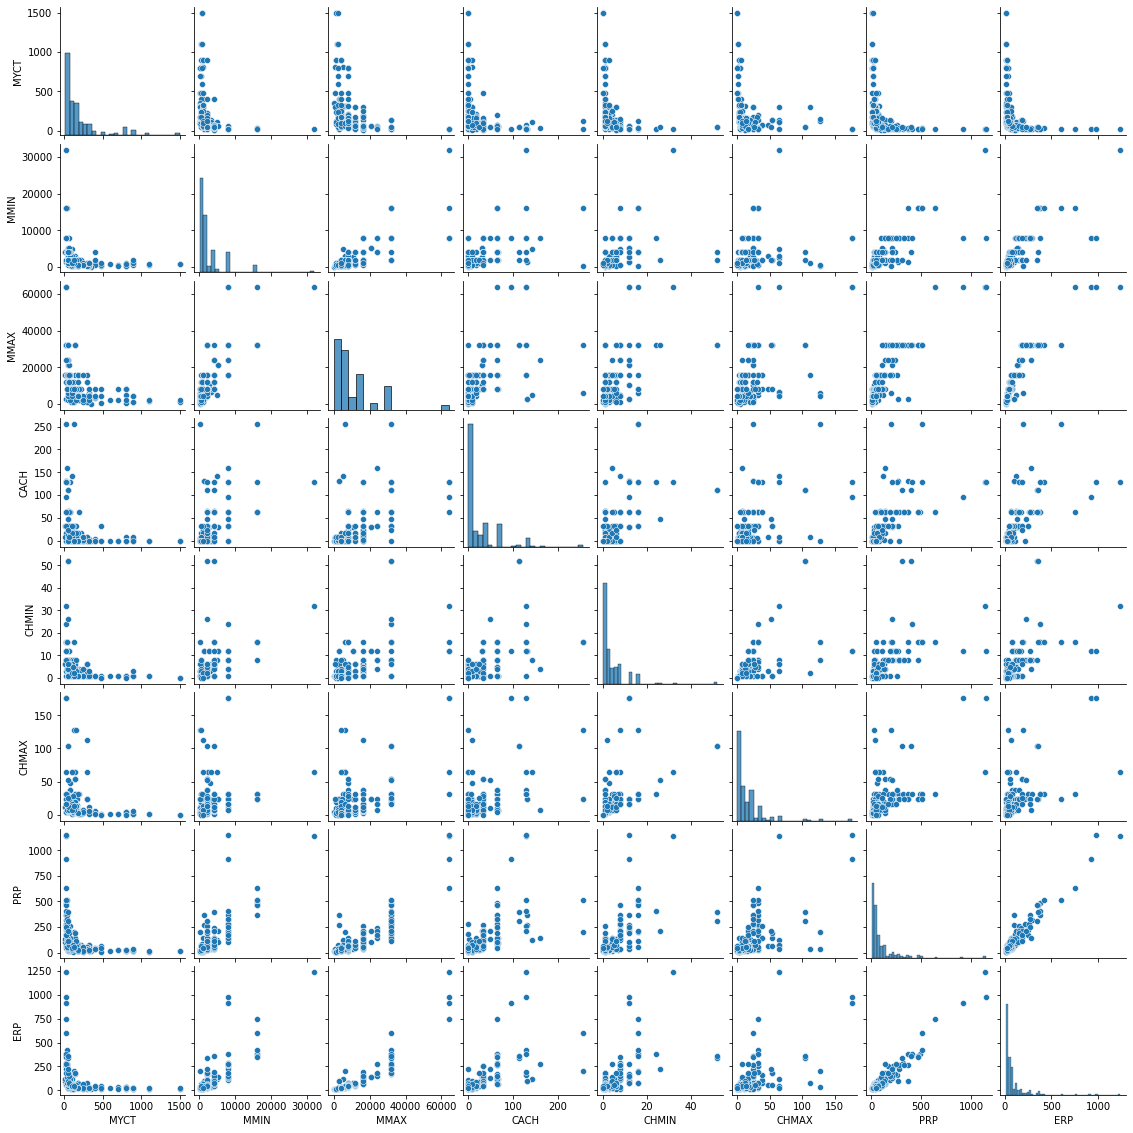

In [ ]:
#Graph the relationship between attributes
sns.pairplot(dataset, height = 2.0)

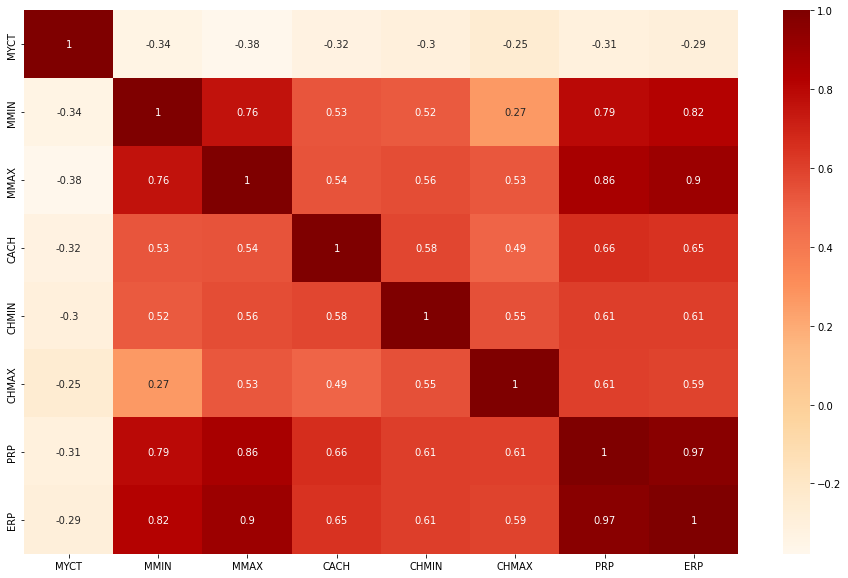

In [ ]:
#Create a subplot
ax, fig = plt.subplots(figsize=(16,10))

#Using pandas to generate a matrix
correlation_matrix = dataset.corr()

#Create a heatmap and make it shows the correlation annotation
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")

plt.show()

#Here we can see MYCT has the lowest correlation with other attributes
#Both ERP and PRP have strong correlationw with other attributes

In [ ]:
#This function will split the dataset into two sets
#The training set will be what the model trains on
#The test set will be the one we use to evaluate how well the model does 

from sklearn.model_selection import train_test_split

#We are dropping "Vendor Name" and "Model Name" because they are strings, and our model wouldn't work with strings. 
#We are dropping "PRP" because that is the factor we want to analyse.
#We are also dropping "ERP" because it was the author's previous prediction of the "PRP" which will allow for higher correlation but irrelevant for real world application

x = dataset.drop(["vendor_name", "Model_Name", "PRP", "ERP"], axis=1)

#we will use these 7 columns as the input model
x.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16


In [ ]:
#We choose to make the model to find the PRP (output) because it should have direct and strong correlation with the other factors.
y = dataset['PRP']
y.head()

0    198
1    269
2    220
3    172
4    132
Name: PRP, dtype: int64

In [ ]:
#pass in x (input set), y (output set), test_size (the percentage of our original dataset we want to use as the test set),
#and a random_state(to make sure we don't get the same answer everytime) as an argument to train_test_split.
#train_test_split returns 4 datasets: train_x, test_x, train_y, and test_y.
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state=42)

In [ ]:
train_x.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
128,50,2000,16000,24,1,6
79,180,768,12000,6,1,31
204,124,1000,8000,0,1,8
178,160,1000,4000,8,1,14
31,25,1310,2620,131,12,24


In [ ]:
#Multiple Linear regression model
#We will use LinearRegression because we will try to predict a real number and PRP is a continuous number
from sklearn.linear_model import LinearRegression

#Pick the Linear Regression model and instantiate it
model = LinearRegression()

In [ ]:
# Fit/build the model
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
#Show the 'm's (as in 'y = m*x + c') that the model learned from the data.
model.coef_

array([1.85687856e-02, 1.26700885e-02, 3.52215585e-03, 7.12586792e-01,
       3.65187954e+00, 2.77086622e-02])

In [ ]:
#Predict the y of text_x
predicted = model.predict(test_x)

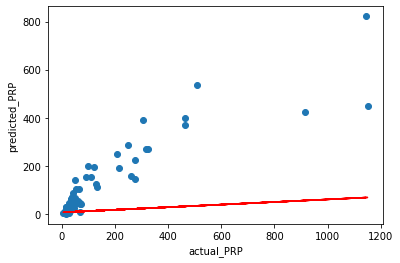

In [ ]:
#Make a plot to compare the test_y (actual result) with the Predicted result
plt.scatter(test_y,predicted)
plt.xlabel('actual_PRP')
plt.ylabel('predicted_PRP')
#plt.plot(test_y, 7.14+0.054*test_y, 'r')
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


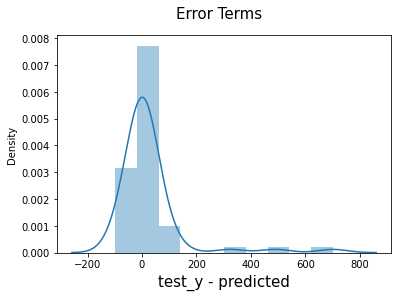

In [ ]:
res = test_y - predicted
fig=plt.figure()
sns.distplot(res, bins=10)
fig.suptitle('Error Terms', fontsize=15 )
plt.xlabel('test_y - predicted', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(test_y,predicted))
r_square=r2_score(test_y, predicted)
print(r_square)

0.7382076147408105


In [ ]:
# Gives the R^2 (coefficient of determination) of the model
#It shows how well the data fits the model.
model.score(test_x,test_y)

0.7382076147408105

In [ ]:
from sklearn import linear_model

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.coef_

array([1.85687856e-02, 1.26700885e-02, 3.52215585e-03, 7.12586792e-01,
       3.65187954e+00, 2.77086622e-02])

In [ ]:
predicted = model.predict(test_x)

In [ ]:
model.score(test_x,test_y)

0.7382076147408105